In [34]:
%pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [36]:
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df = pd.read_csv("MICRODADOS_ENEM_2022.csv", sep=";", encoding="ISO-8859-1", usecols=columns)
print(df.shape)
print(df.head())

(3476105, 5)
   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0         NaN         NaN         NaN         NaN              NaN
1         NaN         NaN         NaN         NaN              NaN
2       421.1       546.0       498.8       565.3            760.0
3       490.7       388.6       357.8       416.0            320.0
4         NaN         NaN         NaN         NaN              NaN


In [37]:
df.dropna(inplace=True, subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'])
df.head()
df.shape
df = df.sample(n=1000000)
df.shape

(1000000, 5)

In [38]:
y = df['NU_NOTA_REDACAO']
x = df.drop(axis=1, columns="NU_NOTA_REDACAO")
x

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1742046,477.9,609.6,636.7,630.0
1378549,558.4,609.5,686.2,593.8
488250,465.8,611.7,589.8,421.5
700480,418.5,492.3,346.0,494.5
431326,536.4,624.9,565.6,646.7
...,...,...,...,...
1812413,547.6,541.6,612.3,519.3
201610,530.9,613.0,572.7,533.1
1498913,476.3,512.1,544.8,519.0
3061605,436.3,482.1,434.6,418.0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.values.tolist()
y_train = y_train.values.tolist()
print(len(y_train))
print(len(y_test))

800000
200000


In [40]:
def rmse(predict_values, y_test):
    y_mean = sum(y_test)/len(y_test)
    eq_sum = sum((yi - y_mean) ** 2 for yi in predict_values)
    rmse = math.sqrt(eq_sum / len(predict_values))
    return rmse

In [41]:
def get_predict_value(beta, xi):
    return np.dot(xi, beta)

beta_values = np.random.random(4)
n_iterations = 100
alfa = 0.001

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)

predict_values_list = []
print("Valores iniciais de beta:", beta_values)
for beat_index, beta in enumerate(beta_values):
    gradient = 0 
    for iter in range(n_iterations):   
        for xi_index, xi in enumerate(x_train):
            predict_value = get_predict_value(beta_values, xi)
            xij = xi[beat_index]
            gradient += xij * (predict_value - y_train[xi_index])
   
    beta_values[beat_index] -= (alfa * 1/len(x_train)) * gradient 

print("Valores finais de beta:", beta_values)

Valores iniciais de beta: [0.76336908 0.52948588 0.46155095 0.87203502]
Valores finais de beta: [0.6194697  0.40119195 0.34991743 0.75019967]


In [42]:
predictions = []
x = x_test.values.tolist()
for xi in x:
    predictions.append(get_predict_value(beta_values, xi))

In [43]:
y_mean = sum(y_test)/len(y_test)
eq_sum = sum((yi - y_mean) ** 2 for yi in predictions)
rmse = math.sqrt(eq_sum / len(predictions))

print("RMSE:", rmse)

RMSE: 506.83234301254623


Text(0.5, 1.0, 'valores reais x preditos')

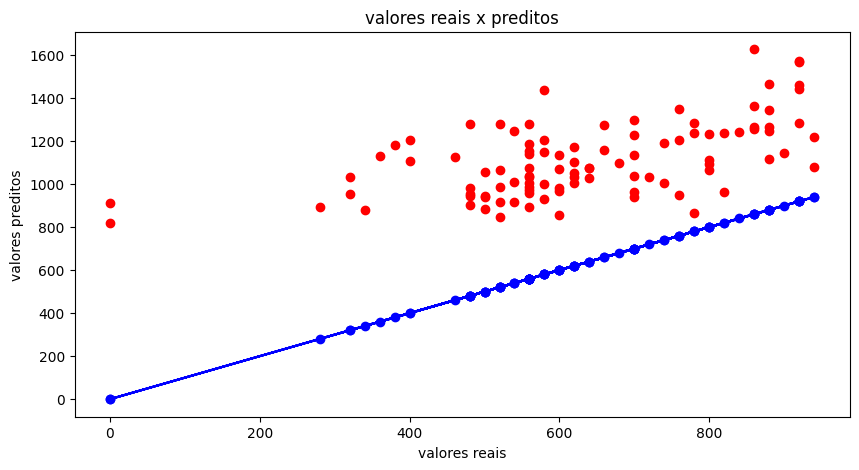

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], y_test[:100], label='Line Plot', color='blue', marker='o')
plt.scatter(y_test[:100], predictions[:100], label='Scatter Plot', color='red')
plt.xlabel('valores reais')
plt.ylabel('valores preditos')
plt.title('valores reais x preditos')
# plt.grid(True))
